# 1.Download the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler 
SS = StandardScaler()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 2. Load the dataset into the tool.

In [2]:
df = pd.read_csv('C:\\Users\\jey\\OneDrive\\Desktop\\KALAI PROJECT\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [4]:
df.drop(columns = 'CustomerID', inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
df.shape

(200, 4)

# 3. Perform Below Visualizations.

# UNIVARIATE ANALYSIS:

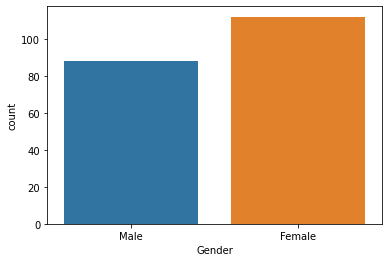

In [9]:
sns.countplot(df.Gender)
plt.show()

In [10]:
# More number of Female customers in the dataset

# BIVARIATE ANALYSIS:

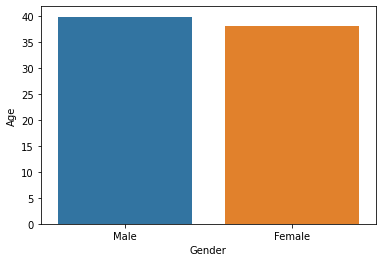

In [11]:
sns.barplot(df.Gender, df.Age, ci=0)
plt.show()

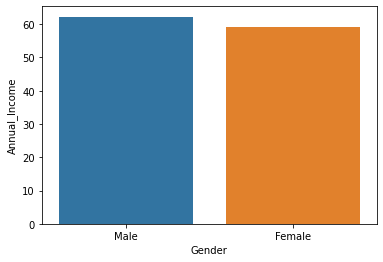

In [12]:
sns.barplot(df.Gender, df.Annual_Income, ci=0)
plt.show()

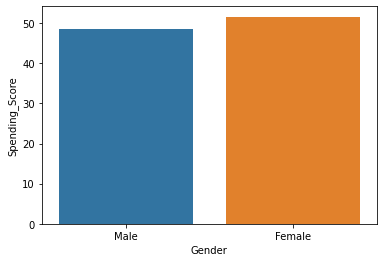

In [13]:
sns.barplot(df.Gender, df.Spending_Score, ci=0)
plt.show()

In [14]:
# Average age of men coming to mall is greater than average age of women
# Annual Income of men is more than the annual income of female customers
# Spending score of female customers is more than the male customers

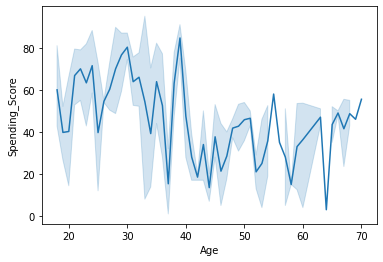

In [15]:
sns.lineplot(x=df.Age, y=df.Spending_Score)
plt.show()

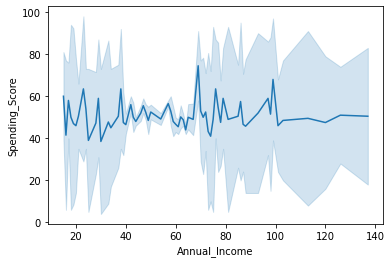

In [16]:
sns.lineplot(x=df.Annual_Income, y=df.Spending_Score)
plt.show()

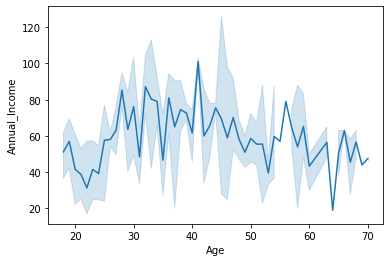

In [17]:
sns.lineplot(x=df.Age, y=df.Annual_Income)
plt.show()

# MULTIVARIATE ANALYSIS:

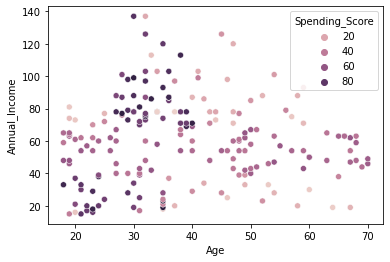

In [18]:
sns.scatterplot(df.Age, df.Annual_Income, hue=df.Spending_Score)
plt.show()

# 4. Perform descriptive statistics on the dataset.

In [19]:
df.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [20]:
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


# 5.Check for Missing values and deal with them.

In [21]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [22]:
# 6. Find the outliers and replace them outliers

<AxesSubplot:xlabel='Age'>

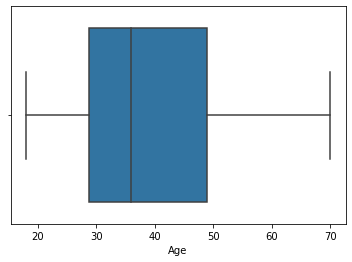

In [23]:
sns.boxplot(df['Age'])

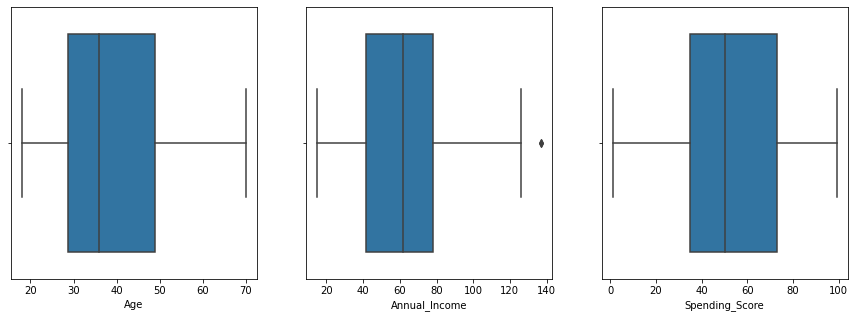

In [24]:
fig, ax = plt.subplots(1,3,figsize = [15,5])
for var, subplot in zip(['Age', 'Annual_Income', 'Spending_Score'], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

In [25]:
# No major outliers present in the dataset

# 7. Check for Categorical columns and perform encoding.

In [26]:
df_en = pd.get_dummies(df, columns = ['Gender'], drop_first = True)
df_en.shape

(200, 4)

In [27]:
df_en.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# 8. Scaling the data

In [28]:
df_en[['Age', 'Annual_Income', 'Spending_Score']] = SS.fit_transform(df_en[['Age', 'Annual_Income', 'Spending_Score']])

df_en.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


# 9. Perform any of the clustering algorithms

In [29]:
df_num = df_en.drop(columns = 'Gender_Male')
df_num.head()

,Age,Annual_Income,Spending_Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [30]:
wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, random_state = 5)
    kmeans.fit(df_num)
    wcss.append(kmeans.inertia_)

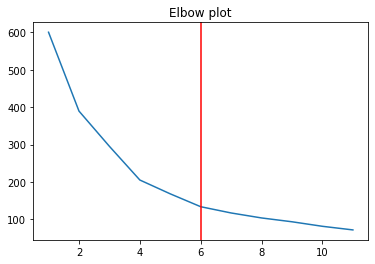

In [31]:
plt.plot(range(1,12), wcss)

plt.title('Elbow plot')

plt.axvline(x=6, color='red')


In [32]:
# Optimal number of clusters is 6

In [33]:
n_clusters = [2,3,4,5,6,7,8,9]

for k in n_clusters:
    cluster = KMeans(n_clusters = k, random_state = 5)
    predict = cluster.fit_predict(df_num)
    score = silhouette_score(df_num, predict, random_state = 5)
    print('For {} clusters the silhouette score is {}'.format(k,score))

For 2 clusters the silhouette score is 0.33547192894004574
For 3 clusters the silhouette score is 0.357793388710272
For 4 clusters the silhouette score is 0.4039582785148566
For 5 clusters the silhouette score is 0.41664341513732767
For 6 clusters the silhouette score is 0.4268547747113388
For 7 clusters the silhouette score is 0.41672550059464647
For 8 clusters the silhouette score is 0.40753744446458967
For 9 clusters the silhouette score is 0.4075026403315981


# 10. Add the cluster data with the primary dataset

In [34]:
# By silhouette score also, the optimal cluster size is 6

In [35]:
new_clusters = KMeans(n_clusters = 6, random_state = 5)

new_clusters.fit(df_num)

df['Cluster'] = new_clusters.labels_

In [36]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,Male,19,15,39,5
1,Male,21,15,81,5
2,Female,20,16,6,2
3,Female,23,16,77,5
4,Female,31,17,40,2


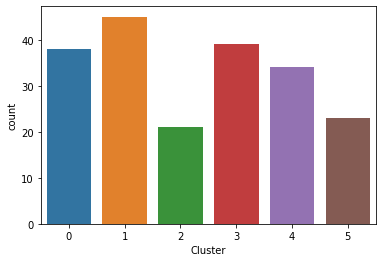

In [37]:
sns.countplot(df.Cluster)
plt.show()

In [38]:
# Lets visualize the clusters

<Figure size 576x432 with 0 Axes>

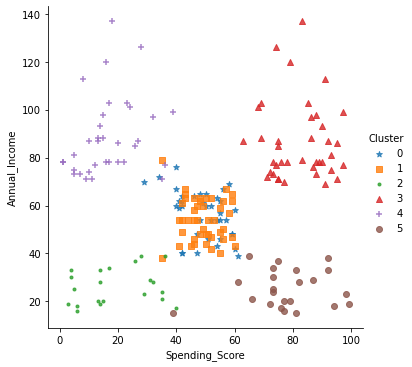

In [39]:
plt.figure(figsize = [8,6])
sns.lmplot(x='Spending_Score', y='Annual_Income', data = df, hue='Cluster', 
               markers = ['*',',','.','^','+','o'], fit_reg = False, size=5)
plt.show()

In [40]:
# Statistical summary of clusters

In [41]:
df[df.Cluster == 0].describe()

,Age,Annual_Income,Spending_Score,Cluster
count,38.000000,38.000000,38.000000,38.0
mean,27.000000,56.657895,49.131579,0.0
std,7.032742,9.905708,7.853975,0.0
min,18.000000,39.000000,29.000000,0.0
25%,21.000000,48.000000,42.000000,0.0
50%,26.500000,59.500000,50.000000,0.0
75%,31.750000,63.750000,55.000000,0.0
max,40.000000,76.000000,61.000000,0.0


In [42]:
df[df.Cluster == 1].describe()

,Age,Annual_Income,Spending_Score,Cluster
count,45.000000,45.000000,45.000000,45.0
mean,56.333333,54.266667,49.066667,1.0
std,8.453079,8.975725,6.300794,0.0
min,43.000000,38.000000,35.000000,1.0
25%,49.000000,47.000000,45.000000,1.0
50%,54.000000,54.000000,49.000000,1.0
75%,65.000000,62.000000,55.000000,1.0
max,70.000000,79.000000,60.000000,1.0


In [43]:
df[df.Cluster == 2].describe()

,Age,Annual_Income,Spending_Score,Cluster
count,21.000000,21.000000,21.000000,21.0
mean,45.523810,26.285714,19.380952,2.0
std,11.766984,7.437357,12.555780,0.0
min,20.000000,16.000000,3.000000,2.0
25%,36.000000,20.000000,6.000000,2.0
50%,46.000000,25.000000,15.000000,2.0
75%,53.000000,33.000000,31.000000,2.0
max,67.000000,39.000000,40.000000,2.0


In [44]:
df[df.Cluster == 3].describe()

,Age,Annual_Income,Spending_Score,Cluster
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,3.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,3.0
25%,30.000000,75.500000,74.500000,3.0
50%,32.000000,79.000000,83.000000,3.0
75%,35.500000,95.000000,90.000000,3.0
max,40.000000,137.000000,97.000000,3.0


In [45]:
df[df.Cluster == 4].describe()

,Age,Annual_Income,Spending_Score,Cluster
count,34.000000,34.000000,34.000000,34.0
mean,41.264706,88.500000,16.764706,4.0
std,10.768385,16.533254,9.881292,0.0
min,19.000000,71.000000,1.000000,4.0
25%,34.500000,77.250000,10.000000,4.0
50%,42.500000,85.500000,15.500000,4.0
75%,47.000000,97.750000,22.750000,4.0
max,59.000000,137.000000,39.000000,4.0


In [46]:
df[df.Cluster == 5].describe()

,Age,Annual_Income,Spending_Score,Cluster
count,23.000000,23.000000,23.000000,23.0
mean,25.000000,25.260870,77.608696,5.0
std,5.300086,7.723738,13.272457,0.0
min,18.000000,15.000000,39.000000,5.0
25%,21.000000,19.000000,73.000000,5.0
50%,23.000000,24.000000,77.000000,5.0
75%,29.500000,31.500000,84.500000,5.0
max,35.000000,39.000000,99.000000,5.0


# 11. Split the data into dependent and independent variables.

In [57]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first = True)
df.shape

(200, 5)

In [58]:
df.head()

,Age,Annual_Income,Spending_Score,Cluster,Gender_Male
0,19,15,39,5,1
1,21,15,81,5,1
2,20,16,6,2,0
3,23,16,77,5,0
4,31,17,40,2,0


In [59]:
X=df.drop('Cluster',axis=1)

In [60]:
y=df['Cluster']

# 12. Split the data into training and testing

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 4)
(160,)
(40, 4)
(40,)


# 13. Build the Model

In [75]:
model =GaussianNB()

# 14. Train the Model

In [81]:
model.fit(x_train,y_train)

GaussianNB()

y_pred = model.predict(x_train)

In [78]:
model.score(x_train,y_train)

0.99375

# 15. Test the Model

In [79]:
y_pred_test = model.predict(x_test)

# 16. Measure the performance using Evaluation Metrics

In [83]:
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred_test)

array([[10,  0,  0,  0,  1,  0],
       [ 0,  8,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40

